In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Hotel_bookings_cleaned.csv")

In [3]:
df["Check_in_date"] = pd.to_datetime(df["Check_in_date"])
df["Check_out_date"] = pd.to_datetime(df["Check_out_date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking_id         10000 non-null  int64         
 1   Room_type          10000 non-null  object        
 2   Check_in_date      10000 non-null  datetime64[ns]
 3   Check_out_date     10000 non-null  datetime64[ns]
 4   Stay_duration      10000 non-null  int64         
 5   Room_price         10000 non-null  int64         
 6   Room_service_cost  10000 non-null  int64         
 7   Total_bill         10000 non-null  int64         
 8   Price_per_day      10000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 703.3+ KB


In [5]:
df.describe()

,Booking_id,Check_in_date,Check_out_date,Stay_duration,Room_price,Room_service_cost,Total_bill,Price_per_day
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2024-12-31 05:35:57.120000,2025-01-04 06:13:32.160000,4.026100,6492.000000,1496.545900,27580.945900,7040.519411
min,1.00000,2024-01-01 00:00:00,2024-01-02 00:00:00,1.000000,2000.000000,0.000000,2002.000000,2000.250000
25%,2500.75000,2024-07-06 00:00:00,2024-07-10 00:00:00,2.000000,2000.000000,747.000000,10843.000000,4031.892857
50%,5000.50000,2025-01-04 00:00:00,2025-01-08 00:00:00,4.000000,8000.000000,1492.000000,20160.000000,8002.309524
75%,7500.25000,2025-06-29 00:00:00,2025-07-02 00:00:00,6.000000,8000.000000,2241.000000,40118.750000,10791.750000
max,10000.00000,2025-12-30 00:00:00,2026-01-06 00:00:00,7.000000,12000.000000,2999.000000,86994.000000,14997.000000
std,2886.89568,NaN,NaN,1.997503,3833.563045,867.338128,21548.768662,3885.489078


Total Revenue Generated

In [6]:
df["Total_bill"].sum()
print("Total revenue earned by the hotel=",df["Total_bill"].sum())

Total revenue earned by the hotel= 275809459


Average Revenue per Booking

In [7]:
print("Typical revenue from one booking=",df["Total_bill"].mean())

Typical revenue from one booking= 27580.9459


Highest & Lowest Revenue

In [8]:
print("Highest Revenue:",df["Total_bill"].max())

Highest Revenue: 86994


In [9]:
print("Lowest Revenue:",df["Total_bill"].min())

Lowest Revenue: 2002


Revenue by Room Type

In [10]:
#Which room type generates the most revenue?
revenue_by_room = df.groupby("Room_type")["Total_bill"].sum()
revenue_by_room

Room_type
Deluxe        43502029
Executive     85394936
Standard      24144012
Suite        122768482
Name: Total_bill, dtype: int64

Find the Room Type with Highest Revenue

In [11]:
most_revenue_room = revenue_by_room.idxmax()
highest_revenue = revenue_by_room.max()
print("Room type with highest revenue:", most_revenue_room)
print("Highest revenue generated:", highest_revenue)

Room type with highest revenue: Suite
Highest revenue generated: 122768482


Booking Count by Room Type

In [12]:
df["Room_type"].value_counts()

Room_type
Executive    2537
Standard     2514
Suite        2475
Deluxe       2474
Name: count, dtype: int64

High Demand Room Type

In [13]:
booking_count_by_room = df["Room_type"].value_counts()

high_demand_room = booking_count_by_room.idxmax()
highest_bookings = booking_count_by_room.max()

print("Room type with highest demand:", high_demand_room)
print("Number of bookings:", highest_bookings)

Room type with highest demand: Executive
Number of bookings: 2537


Average Stay Duration by Room Type

In [14]:
#Average Stay Duration by Room Type #Which customers stay longer?(Longer stays = stable revenue)
avg_stay_by_room = df.gavg_stay_by_room = df.groupby("Room_type")["Stay_duration"].mean()
avg_stay_by_room

C:\Users\priya\AppData\Local\Temp\ipykernel_8784\3232252608.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  avg_stay_by_room = df.gavg_stay_by_room = df.groupby("Room_type")["Stay_duration"].mean()


Room_type
Deluxe       4.028294
Executive    4.020497
Standard     4.047733
Suite        4.007677
Name: Stay_duration, dtype: float64

Longest Average Stay Duration by Room Type

In [15]:
longest_stay_room = avg_stay_by_room.idxmax()
max_avg_stay = avg_stay_by_room.max()
print("Room type with longest average stay:", longest_stay_room)
print("Average stay duration (days):", round(max_avg_stay, 2))

Room type with longest average stay: Standard
Average stay duration (days): 4.05


Time-Based Analysis

In [16]:
#Extract Month
df["Month"] = df["Check_in_date"].dt.month
df["Month"]

0        7
1        6
2        4
3        7
4        6
        ..
9995    12
9996     4
9997     8
9998     9
9999     9
Name: Month, Length: 10000, dtype: int32

Bookings per Month (Peak Season Detection)

In [17]:
bookings_per_month = df.groupby("Month")["Booking_id"].count()
bookings_per_month

Month
1     879
2     798
3     889
4     802
5     852
6     794
7     800
8     909
9     806
10    837
11    816
12    818
Name: Booking_id, dtype: int64

In [18]:
#Which month has the highest customer demand?
peak_month = bookings_per_month.idxmax()
peak_bookings = bookings_per_month.max()

print("Peak booking month:", peak_month)
print("Number of bookings:", peak_bookings)

Peak booking month: 8
Number of bookings: 909


In [19]:
#Bookings per month (To Identify peak seasons )
df.groupby("Month")["Booking_id"].count()

Month
1     879
2     798
3     889
4     802
5     852
6     794
7     800
8     909
9     806
10    837
11    816
12    818
Name: Booking_id, dtype: int64

Revenue Trend by Month (Seasonal Revenue Pattern)

In [20]:
revenue_per_month = df.groupby("Month")["Total_bill"].sum()
revenue_per_month

Month
1     23826200
2     22000656
3     25103235
4     21638076
5     24155963
6     22276620
7     21757281
8     25809150
9     21996469
10    22927034
11    22684032
12    21634743
Name: Total_bill, dtype: int64

In [21]:
#Which month generates the most revenue?
highest_revenue_month = revenue_per_month.idxmax()
highest_revenue = revenue_per_month.max()

print("Month with highest revenue:", highest_revenue_month)
print("Revenue generated:", highest_revenue)

Month with highest revenue: 8
Revenue generated: 25809150


Revenue by Room Type (Bar Chart)

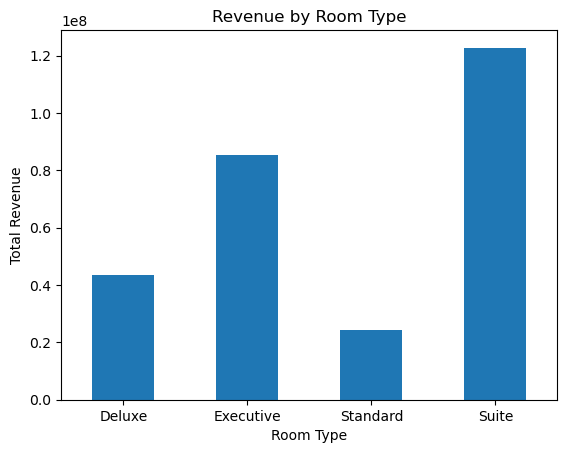

In [22]:
import matplotlib.pyplot as plt

revenue_by_room.plot(kind="bar")

plt.title("Revenue by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

This chart clearly shows which room types contribute most to total hotel revenue, helping management focus pricing and promotion strategies.

Monthly Booking Trend (Line Chart)

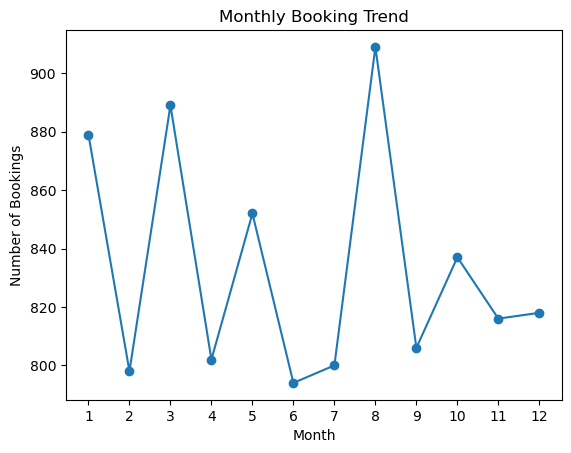

In [23]:
df.groupby("Month")["Booking_id"].count().plot(kind="line", marker="o")

plt.title("Monthly Booking Trend")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(range(1, 13))
plt.show()

The line chart highlights seasonal booking patterns, allowing the hotel to plan staffing, pricing, and marketing during peak and off-peak months.